In [1]:
import pandas as pd
import numpy as np

In [2]:
wind_data = pd.read_csv('../../data/series/sample/vortex.serie.txt', 
 header=2, delim_whitespace=True, parse_dates={'timestamp': ['YYYYMMDD', 'HHMM']}, keep_date_col=False)

In [3]:
# Define a function to calculate the circular mean
def circmean(alpha, low, high):
    """Calculate the circular mean of an array of angles (in degrees) that range from low to high"""
    alpha = np.deg2rad(alpha)
    s = np.sum(np.sin(alpha))
    c = np.sum(np.cos(alpha))
    res = np.rad2deg(np.arctan2(s, c))
    if res < 0:
        res += 360
    return res

In [4]:
wind_data

,timestamp,M(m/s),D(deg),T(C),De(k/m3),PRE(hPa),RiNumber,RH(%),RMOL(1/m)
0,2002-01-01 00:00:00,7.1,127,8.3,1.12,908.0,0.30,88.7,0.0011
1,2002-01-01 01:00:00,7.3,127,8.1,1.13,908.1,0.34,91.4,0.0011
2,2002-01-01 02:00:00,7.5,129,8.1,1.13,908.2,0.46,92.4,0.0010
3,2002-01-01 03:00:00,7.7,132,8.2,1.13,908.1,0.57,91.8,0.0010
4,2002-01-01 04:00:00,7.7,140,8.3,1.12,908.4,0.63,89.6,0.0010
...,...,...,...,...,...,...,...,...,...
184651,2023-01-24 19:00:00,6.6,81,3.6,1.15,913.6,0.09,70.3,0.0014
184652,2023-01-24 20:00:00,7.1,90,3.0,1.15,913.9,0.07,74.4,0.0011
184653,2023-01-24 21:00:00,8.0,98,2.3,1.16,914.3,0.09,78.0,0.0006
184654,2023-01-24 22:00:00,9.9,97,1.6,1.16,914.5,0.11,80.1,0.0003


In [5]:
# Set the timestamp column as the index
wind_data.set_index('timestamp', inplace=True)

# Calculate hourly averages of speed and direction
hourly_averages = wind_data.resample('H').agg({'M(m/s)': 'mean', 'D(deg)': lambda x: circmean(x, 0, 360)})

# Calculate daily averages of speed and direction
daily_averages = wind_data.resample('D').agg({'M(m/s)': 'mean', 'D(deg)': lambda x: circmean(x, 0, 360)})

# Calculate monthly averages of speed and direction
monthly_averages = wind_data.resample('M').agg({'M(m/s)': 'mean', 'D(deg)': lambda x: circmean(x, 0, 360)})

# Calculate yearly averages of speed and direction
yearly_averages = wind_data.resample('Y').agg({'M(m/s)': 'mean', 'D(deg)': lambda x: circmean(x, 0, 360)})



# Print out the first few rows of each average data frame
print(hourly_averages.head())
print(daily_averages.head())
print(monthly_averages.head())
print(yearly_averages.head())

                     M(m/s)  D(deg)
timestamp                          
2002-01-01 00:00:00     7.1   127.0
2002-01-01 01:00:00     7.3   127.0
2002-01-01 02:00:00     7.5   129.0
2002-01-01 03:00:00     7.7   132.0
2002-01-01 04:00:00     7.7   140.0
               M(m/s)      D(deg)
timestamp                        
2002-01-01   8.725000  129.997873
2002-01-02  13.375000  156.926063
2002-01-03   8.041667  267.122738
2002-01-04   6.250000  112.071281
2002-01-05   8.766667  112.461233
              M(m/s)      D(deg)
timestamp                       
2002-01-31  6.798387  162.728243
2002-02-28  7.039435  202.899095
2002-03-31  6.694624  147.699292
2002-04-30  5.931250  323.530848
2002-05-31  6.735618  289.656499
              M(m/s)      D(deg)
timestamp                       
2002-12-31  6.613699  242.886136
2003-12-31  6.606541  230.371589
2004-12-31  6.585667  250.393411
2005-12-31  6.849623  141.764176
2006-12-31  6.826781  204.397278


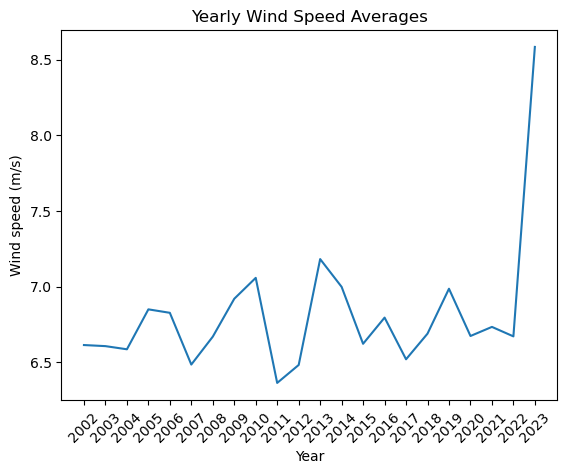

In [11]:
import matplotlib.pyplot as plt

# Plot the yearly averages
plt.plot(yearly_averages.index, yearly_averages['M(m/s)'])

# Set the x-axis tick labels to show only the year
plt.xticks(yearly_averages.index, [d.strftime('%Y') for d in yearly_averages.index], rotation=45)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Wind speed (m/s)')
plt.title('Yearly Wind Speed Averages')
plt.show()

In [13]:
monthly_averages.index = pd.DatetimeIndex(monthly_averages.index)
monthly_averages.index = monthly_averages.index.strftime('%Y-%m')
monthly_averages.to_csv('monthly_averages.csv', index_label='timestamp')